Lab 15: Tensor Flow 

Kobie Williams 

4/12/2022 

The purpose of this file is to make a simple artificial neural network using Keras and Tensorflow 

In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [70]:
#Load the MNIST dataset 
mnist = tf.keras.datasets.mnist 

# Separate into train and test data and labels 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

#Preprocess for more stable training of the neural network 
# by normalizing the data values to be between 0 and 1 
x_train = x_train / 255.0 
x_test = x_test / 255.0 

In [71]:
x_train.shape

(60000, 28, 28)

In [72]:
y_train.shape

(60000,)

In [73]:
x_test.shape

(10000, 28, 28)

In [74]:
y_test.shape

(10000,)

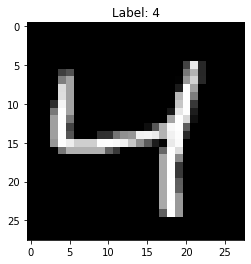

In [75]:
train_idx = 2 
plt.imshow(x_train[train_idx], cmap='gray') 
plt.title('Label: {}'.format(y_train[train_idx])) 
plt.show() 


In [76]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), 
  tf.keras.layers.Dense(40,activation='relu'),
  tf.keras.layers.Dense(16), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10) 
])

In [77]:
predictions = model(x_train[:1]).numpy() 
predictions

array([[-0.225468  ,  0.25006944, -0.343845  , -0.02234282,  0.4332015 ,
        -0.55791193,  0.33313355, -0.08753837, -0.10407096,  0.10575063]],
      dtype=float32)

In [78]:
tf.nn.softmax(predictions).numpy() 

array([[0.07818785, 0.12579475, 0.06945904, 0.09579777, 0.1510761 ,
        0.05607389, 0.13669002, 0.08975142, 0.08827978, 0.10888942]],
      dtype=float32)

In [79]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 


In [80]:
model.compile(optimizer='adam',
              loss=loss_fn, 
              metrics=['accuracy']) 


In [81]:
model.fit(x_train, y_train, epochs=4) 


Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4013 - accuracy: 0.8824
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2068 - accuracy: 0.9403
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1607 - accuracy: 0.9526
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1349 - accuracy: 0.9594


In [82]:
model.evaluate(x_train,y_train,verbose=2) 

1875/1875 - 3s - loss: 0.0807 - accuracy: 0.9754 - 3s/epoch - 2ms/step


[0.08074792474508286, 0.9753833413124084]

In [83]:
model.evaluate(x_test, y_test, verbose=2) 

313/313 - 1s - loss: 0.1076 - accuracy: 0.9678 - 966ms/epoch - 3ms/step


[0.10758572816848755, 0.9678000211715698]

In [84]:
probability_model = tf.keras.Sequential([
  model, tf.keras.layers.Softmax() 
])

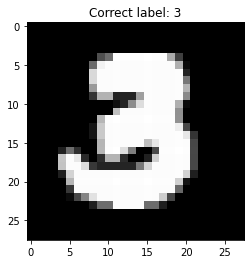

Predicted probabilities:


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.6754397e-08, 2.0402865e-07, 2.4569363e-04, 9.9973971e-01,
        1.7989955e-10, 1.0481653e-05, 4.8807380e-10, 3.3469456e-07,
        3.2442665e-06, 1.6802478e-07]], dtype=float32)>

In [85]:
test_idx = 200 
plt.imshow(x_test[test_idx], cmap=plt.cm.gray) 
plt.title('Correct label: {}'.format(y_test[test_idx])) 
plt.show() 
print('Predicted probabilities:') 
probability_model(x_test[test_idx:test_idx+1]) 


1) The test set had an accuracy of about 94.5% while the training set had an accuracy of about 94.9%. 

2a) Done 

2b) Done 

2c) Done 

2d) The accuracy that I ended up getting was 97.5% for the training data and 96.8% for the test data. 

3) Our model is not overfitting because the training data and test data accuracy has continouosly improved and the training data accuracy is still greater than the test data. Once we see a decrease, then we can know that there is overfitting. 